In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
% pylab inline


Populating the interactive namespace from numpy and matplotlib


In [2]:
feat_name = 'pet_mr_radiomics'
# feat_name = 'Tumor_Grade'
# feat_name = 'BC_subtype'

df_yr = range(1,6,1)
outcome_names = ['DF_{}yr'.format(yy) for yy in df_yr]
# outcome_names = ['DF_2yr']

n_trial = 10
k_fold = 3

rootdir = '/Users/shuang/Documents/Proj_Radiomics/Data/her2'
the_mri_tp = 2
the_mri_bin_width = 5
the_pet_bin_width = 0.1
data_dir = '{}/her2_Analysis/PETMRI/PETbinwidth{:.1f}_MRItp{}_binwidth{}/Learner'.format(rootdir,the_pet_bin_width, the_mri_tp, the_mri_bin_width)

# fname = '{}/CLF_output_all.csv'.format(data_dir)
fname = '{}/CLF_output_all_boostrapCI.csv'.format(data_dir)
df_data_all = pd.read_csv(fname)


# create custome labels for the display
# df_data_all['label'] = df_data_all.apply(lambda row: '{:.2f} ({:.2f}, {:.2f})'.format(row['AUC_mean'], row['CI_lo_mean'], row['CI_hi_mean']), axis=1)
df_data_all['label'] = df_data_all.apply(lambda row: '{:.2f} ({:.2f}, {:.2f})'.format(row['AUC_hat'], row['CI_lo'], row['CI_hi']), axis=1)
print(df_data_all)

             clf_name  n_trial  k_fold         Indep_var Dep_var   AUC_hat  \
0          ElasticNet     1000       3  pet_mr_radiomics  DF_1yr  0.742784   
1   L1LiblinearLogReg     1000       3  pet_mr_radiomics  DF_1yr  0.739378   
2        L1SagaLogReg     1000       3  pet_mr_radiomics  DF_1yr  0.742883   
3       L2LbfgsLogReg     1000       3  pet_mr_radiomics  DF_1yr  0.708602   
4         L2SagLogReg     1000       3  pet_mr_radiomics  DF_1yr  0.707886   
5    L2NewtoncgLogReg     1000       3  pet_mr_radiomics  DF_1yr  0.704013   
6   L2LiblinearLogReg     1000       3  pet_mr_radiomics  DF_1yr  0.706341   
7        RandomForest     1000       3  pet_mr_radiomics  DF_1yr  0.714997   
8                 SVM     1000       3  pet_mr_radiomics  DF_1yr  0.624502   
9          ElasticNet     1000       3  pet_mr_radiomics  DF_2yr  0.681537   
10  L1LiblinearLogReg     1000       3  pet_mr_radiomics  DF_2yr  0.637968   
11       L1SagaLogReg     1000       3  pet_mr_radiomics  DF_2yr

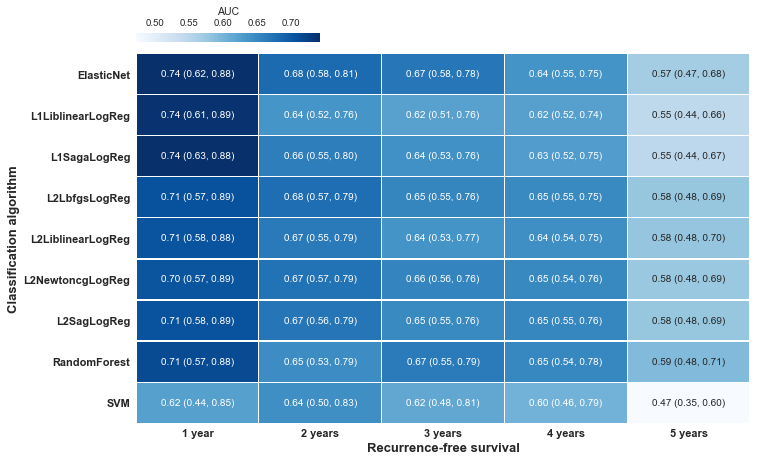

In [4]:
# plot the auc in a heatmap
the_tab = df_data_all.pivot('clf_name','Dep_var','AUC_hat')
the_label = df_data_all.pivot('clf_name','Dep_var','label')
sns.set(font='Arial')
sns.set_context('paper', font_scale=1.2)


plt.figure(figsize=(11,8.5))
g = sns.heatmap(the_tab, annot = the_label, fmt='', annot_kws={'size':10}, linewidth=0.2, cmap='Blues',
                cbar_kws=dict(use_gridspec=False,location="top",label='AUC',shrink=0.3, anchor=(0.0,-0.2)))
# g.set(xlabel='Clinical outcome', ylabel='Classification algorithm')
g.set_xlabel('Recurrence-free survival', {'weight': 'bold', 'size': 13})
g.set_ylabel('Classification algorithm', {'weight': 'bold', 'size': 13})
g.set_xticklabels(['1 year', '2 years', '3 years', '4 years', '5 years'], {'weight': 'bold', 'size': 11})
g.set_yticklabels(g.get_yticklabels(), {'weight': 'bold', 'size': 11})
# fig_name = '{}/CLF_output_all_Heatmap.pdf'.format(data_dir)
fig_name = '{}/CLF_output_all_Heatmap_boostrapCI.pdf'.format(data_dir)
# plt.tight_layout()
plt.savefig(fig_name, bbox_inches='tight')